In [3]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Load and preprocess the dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize pixel values to [0, 1]

# Build the CNN model
model = models.Sequential([
    layers.Reshape((28, 28, 1), input_shape=(28, 28)),  # Reshape for grayscale images
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),  # Dropout for regularization
    layers.Dense(10, activation='softmax')  # Output layer with 10 classes (digits 0-9)
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

# Evaluate the model on test data
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc}")



Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3080 - accuracy: 0.9054 - val_loss: 0.0529 - val_accuracy: 0.9835
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1300 - accuracy: 0.9611 - val_loss: 0.0412 - val_accuracy: 0.9872
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0954 - accuracy: 0.9720 - val_loss: 0.0332 - val_accuracy: 0.9888
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0783 - accuracy: 0.9760 - val_loss: 0.0311 - val_accuracy: 0.9898
Epoch 5/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0688 - accuracy: 0.9796 - val_loss: 0.0285 - val_accuracy: 0.9907
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0614 - accuracy: 0.9810 - val_loss: 0.0329 - val_accuracy: 0.9906
Epoch 7/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0548 - accuracy: 0.9829 - val_loss: 0.0263 - val_ac

313/313 [==============================] - 0s 1ms/step


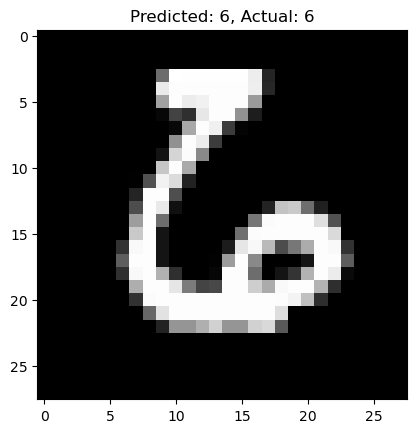

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np

# Get model predictions
predictions = model.predict(x_test)

# Choose a random test sample
sample_index = np.random.randint(0, len(x_test))
sample_image = x_test[sample_index]
predicted_label = np.argmax(predictions[sample_index])  # Convert one-hot to label
actual_label = y_test[sample_index]

# Display the sample image and labels
plt.imshow(sample_image.reshape(28, 28), cmap='gray')
plt.title(f"Predicted: {predicted_label}, Actual: {actual_label}")
plt.show()

